In [22]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:  tf.config.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:  print(e)

import numpy as np
import h5py
import matplotlib.pyplot as plt
import json

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


In [15]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the 28x28 images into vectors of 784 elements
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
        
print(f"Shape of X_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 784)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 784)
Shape of y_test: (10000, 10)


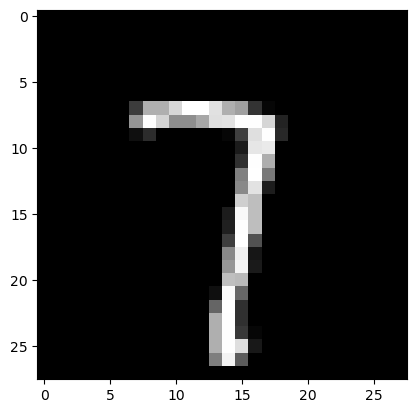

In [16]:
idx = np.random.randint(0, x_train.shape[0])
image = x_train[idx].reshape(28, 28)
label = y_train[idx]

plt.imshow(image, cmap='gray');

In [19]:
# Model Configuration
input_size = 784
hidden_layer_size = 128
output_size = 10

# Building the Fully Connected Neural Network
tf.keras.backend.clear_session()
model = Sequential([
    layers.Dense(hidden_layer_size, input_dim=input_size, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dense(output_size, activation='softmax')  # Output layer with 10 neurons (softmax for classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5


1875/1875 [==============================] - 1s 682us/step - loss: 0.2582 - accuracy: 0.9267 - val_loss: 0.1438 - val_accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 1s 651us/step - loss: 0.1131 - accuracy: 0.9671 - val_loss: 0.1014 - val_accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 1s 656us/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.0912 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 1s 667us/step - loss: 0.0600 - accuracy: 0.9821 - val_loss: 0.0830 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 1s 657us/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0751 - val_accuracy: 0.9773
313/313 - 0s - loss: 0.0751 - accuracy: 0.9773 - 167ms/epoch - 534us/step
Test accuracy: 0.9773


# Save trained weight into `txt` format.

In [28]:
PATH_WEIGHT_FOLDER = r"weight"

weights = model.get_weights()

In [33]:
# Save layer 1 (weights and biases)
np.savetxt(os.path.join(PATH_WEIGHT_FOLDER, 'hidden_weights.txt'), weights[0].flatten(), delimiter=' ')
np.savetxt(os.path.join(PATH_WEIGHT_FOLDER, 'hidden_bias.txt'), weights[1], delimiter=' ')

# Save layer 2 (weights and biases)
np.savetxt(os.path.join(PATH_WEIGHT_FOLDER, 'output_weights.txt'), weights[2].flatten(), delimiter=' ')
np.savetxt(os.path.join(PATH_WEIGHT_FOLDER, 'output_bias.txt'), weights[3], delimiter=' ')

print("Weights and biases saved to separate .txt files.")

Weights and biases saved to separate .txt files.


# Convert image to grayscale for inference

In [43]:
from PIL import Image

input_image_path = 'image/digit.jpg'  
image = Image.open(input_image_path)

gray_image = image.convert('L')

resized_image = gray_image.resize((28, 28))

# Save the resulting image
output_image_path = 'image/digit_gray.jpg'
resized_image.save(output_image_path)


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255], dtype=uint8)